# Support Vector Machines Project 

## The Data

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

In [93]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
#Use seaborn to get the iris data
iris = sns.load_dataset('iris')

## Exploratory Data Analysis

In [10]:
#View head()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


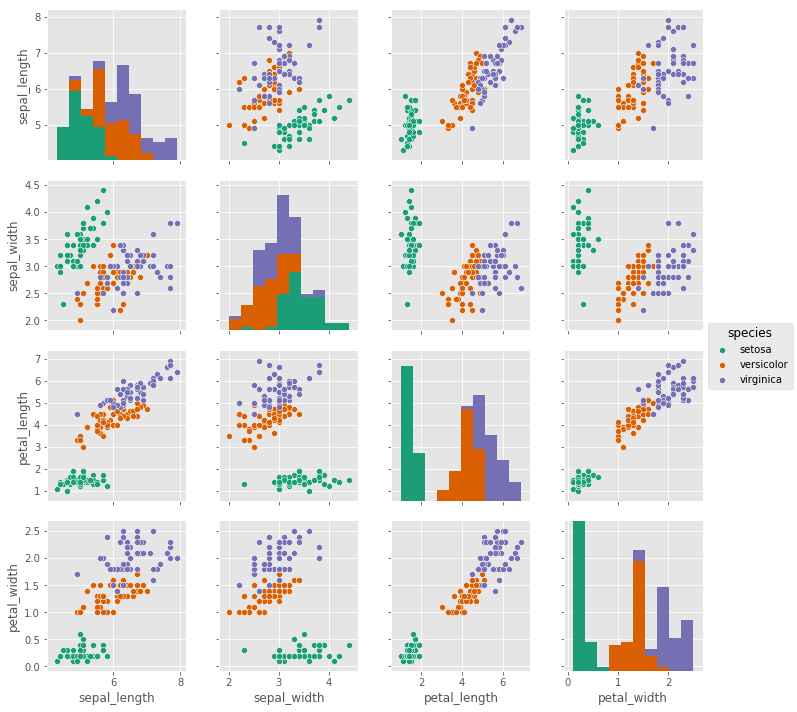

In [12]:
#pairplot of the data set
plt.style.use('ggplot')
sns.pairplot(iris,hue='species',palette= 'Dark2')

### Analysis:
    
Setosa is the flower species seems to be the most separable.

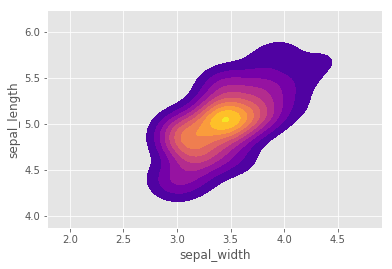

In [20]:
#kde plot of sepal_length versus sepal width for setosa species of flower
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap='plasma', shade=True, shade_lowest=False)

# Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
#Split your data into a training set and a testing set
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=38)

# Train a Model

In [97]:
from sklearn.svm import SVC

In [98]:
#Call the SVC() model from sklearn
model = SVC()

In [99]:
#fit the model to the training data
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [80]:
#get predictions from the model
predictions = model.predict(X_test)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
#create a confusion matrix
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 11  2]
 [ 0  0 15]]


In [102]:
#create a classification report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       1.00      0.85      0.92        13
  virginica       0.88      1.00      0.94        15

avg / total       0.96      0.96      0.96        45



### Results:

Model is very good. The next step is try GridSearch to see if the model can be improved.

## Gridsearch

In [84]:
#Import GridsearchCV from SciKit Learn
from sklearn.model_selection import GridSearchCV

In [85]:
#Create a dictionary called param_grid and fill out some parameters for C and gamma
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [86]:
#create a GridSearchCV object
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [87]:
# Fit the training data with SVC
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

** Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?**

In [88]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [89]:
#find the best parameters from the grid model
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
#create predictions using the test set
grid_predictions = grid.predict(X_test)

In [91]:
#create a confusion matrix
print(confusion_matrix(y_test,grid_predictions))

[[17  0  0]
 [ 0 11  2]
 [ 0  0 15]]


In [92]:
#create a classification report
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       1.00      0.85      0.92        13
  virginica       0.88      1.00      0.94        15

avg / total       0.96      0.96      0.96        45



### Result: 
The gridsearch did exactly the same as running SVM automatically. This makes sense, there is basically just two points that are too noisey to grab. It would be wise not to have an overfit model that would be able to grab those two points.